# Awari - Data Science

## Projeto Unidade 6

Neste projeto você irá realizar uma análise estatística de um dos dataset mais famosos da comunidade de Data Science, o dataset **Titanic**.

Esse dataset contém dados de 891 passageiros do Titanic. A análise vai ser guiada pelas perguntas apresentadas a seguir.

O dataset disponibilizado tem quase a mesma estrutura de uma planilha do excel, com linhas e colunas. O tipo do arquivo é o CSV ou Comma-separated values, que seriam Valores Separados por Vírgula, porque é exatamente assim que ele funciona, você distingue que o valor pertence a diferentes colunas porque a vírgula está ali separando uns dos outros.

O objetivo deste projeto é você aplicar os principais conceitos que você aprendeu na unidade 6.
Todo o projeto deve ser executado neste Jupyter Notebook. Por fim, se desejar, revise as respostas com o seu mentor.

### Descrição dos dados

O dataset possui 891 registros (linhas) e 12 atributos (colunas).

Abaixo estão as descrições das colunas do nosso Dataset:

* passengerid = ID do passageiro do navio (código primário).
* survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.
* pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.
* name = Nome do passageiro
* sex = Gênero do passageiro, sendo masculino e feminino.
* age = Idade do passageiro na data da ocorrência do naufrágio.
* sibsp = Número de irmãos / cônjuges a bordo.
* parch = Número de pais / filhos a bordo.
* ticket = Código do ticket.
* fare = Valor da passagem.
* cabin = Código de identificação da Cabine.
* embarked = Local ondem o passageiro embarcou no navio.

### Carregando os dados

In [30]:
import sys
import pandas as pd

# Carregando os dados
# O arquivo “titanic.csv” deve estar salvo na mesma pasta do seu código Python
dados = pd.read_csv("titanic.csv")

# Exibe o número de linhas e colunas
print(dados.shape)

# Exibe as 10 primeiras linhas
dados.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Inicialmente, vamos tratar os valores faltantes da coluna 'Age':
# Idade das Mulheres
dados_2 = dados.copy()
idade_media = dados_2[(dados_2['Sex'] == 'female') & (dados_2['Age'].isnull() == False)]['Age'].mean()
dados_2['Age'].fillna(idade_media, inplace=True)

In [3]:
# Idade dos Homens
dados_2 = dados.copy()
idade_media = dados_2[(dados_2['Sex'] == 'male') & (dados_2['Age'].isnull() == False)]['Age'].mean()
dados_2['Age'].fillna(idade_media, inplace=True)

In [4]:
dados_2['Age'].isnull().sum()

0

### 1. Qual foi a porcentagem dos passageiros sobreviventes?

Dica: use a função value_counts() do pandas com o parâmetro _normalize_

In [ ]:
# Seu código

In [5]:
dados['Survived'].value_counts(normalize=1)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### 2. Qual era a faixa etária dos passageiros que estavam no Titanic?
Dica: usa a função _describe()_ do pandas

In [ ]:
# Seu código

In [6]:
dados['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# Resposta: A faixa etária dos passageiros está entre 0 e 80 anos.

### 3. Qual porcentagem de homens e mulheres sobreviventes?

In [ ]:
# Seu código

In [7]:
dados[['Survived', 'Sex']].groupby('Sex').sum() * (100 / dados['Survived'].sum())

,Survived
Sex,
female,68.128655
male,31.871345


### 4. Qual a média e desvio padrão dos homens sobreviventes? 

In [ ]:
# Seu código

In [8]:
media = dados[(dados['Sex'] == 'male')]['Survived'].mean()
media

0.18890814558058924

In [9]:
desvio_padrao = dados[(dados['Sex'] == 'male')]['Survived'].std()
desvio_padrao

0.39177527778591387

### 5. Repita os cálculos do item 4 utilizando uma amostra aleatória de 100 passageiros e calculo o erro da média e desvio padrão.

In [ ]:
# Seu código

In [10]:
nova_amostra = dados.head(100)
nova_media = nova_amostra[nova_amostra['Sex'] == 'male']['Survived'].mean()
nova_media

0.16393442622950818

In [11]:
novo_desvio_padrao = nova_amostra[nova_amostra['Sex'] == 'male']['Survived'].std()
novo_desvio_padrao

0.3732884438273999

### 6. Quais os tipos de variáveis nas colunas survived, pclass, name, sex e age?

[Dica ...](# Referência: http://professorguru.com.br/estatistica/introdu%C3%A7%C3%A3o%20%C3%A0%20estat%C3%ADstica/tipos%20de%20vari%C3%A1veis%20estat%C3%ADsticas.html)

In [15]:
# Seu código

In [13]:
# Resposta:
dados[['Survived', 'Pclass', 'Name', 'Sex', 'Age']].dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
dtype: object

In [ ]:
# Resposta:
# Neste caso, teremos a seguinte classificação com relação às variáveis:
# Survived: quantitativa discreta, Pclass: quantitativa discreta, Name: qualitativa nominal, Sex: qualitativa nominal,
# Age: quantitativa contínua.

### 7. Qual o tipo de classe de passagem mais frequente nos dados?

In [ ]:
# Seu código

In [14]:
dados['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [105]:
# Resposta: O tipo de passagem mais frequente é a do tipo 3. 

### 8. Qual a média e desvio padrão do valor das passagens?

In [ ]:
# Seu código

In [15]:
media = dados['Fare'].mean()
media

32.2042079685746

In [16]:
desvio_padrao = dados['Fare'].std()
desvio_padrao

49.693428597180905

### 9. A partir dos dados do dataset calcule:

* a) Qual a probabilidade de um homem com idade entre 15 e 30 anos ter sobrevivido?

* b) Qual a probabilidade de uma mulher de mais de 40 anos e um homem de mais de 50 anos terem sobrevivido?

* c) Calcule as probabilidade de sobrevivência de cada uma das 3 classes (1a, 2a e 3a classe).

In [ ]:
# Seu código

In [17]:
# a) Probabilidde de um homem, com idade entre 15 e 30 anos ter sobrevivido

x = dados[(dados['Survived'] == 1) & 
          ((dados['Sex'] == 'male') & 
           (dados['Age'] > 15) & (dados['Age'] < 30))][['PassengerId','Sex', 'Age', 'Survived']]['PassengerId'].count()
y = dados[dados['Sex'] == 'male']['PassengerId'].count()
prob = (x / y) * 100
print(f'{prob} %')

5.1993067590987865 %


In [18]:
# b) Probabilidade de uma mulher de mais de 40 anos e um homem de mais de 50 anos terem sobrevivido

mulheres_sobreviventes = dados[(dados['Survived'] == 1) & 
               ((dados['Sex'] == 'female') & 
                (dados['Age'] > 40))][['PassengerId','Sex', 'Age', 'Survived']]['PassengerId'].count()
total_mulheres = dados[dados['Sex'] == 'female'][['PassengerId','Sex', 'Age', 'Survived']]['PassengerId'].count()
probab_mulheres = mulheres_sobreviventes / total_mulheres * 100
print(f'{probab_mulheres} %')

11.78343949044586 %


In [19]:
homens_sobreviventes = dados[(dados['Survived'] == 1) & 
               ((dados['Sex'] == 'male') & 
                (dados['Age'] > 50))][['PassengerId','Sex', 'Age', 'Survived']]['PassengerId'].count()
total_homens = dados[dados['Sex'] == 'male'][['PassengerId','Sex', 'Age', 'Survived']]['PassengerId'].count()
homens_sobreviventes
probab_homens = homens_sobreviventes / total_homens * 100
print(f'{probab_homens} %')

1.0398613518197575 %


In [20]:
# Logo, a probabilidade de ambos os casos ocorrerem é a multiplicação das probabilidades individuais:
prob_total = probab_mulheres * probab_homens
print(f'{prob_total} %')

12.253143317621346 %


In [21]:
# c) Probabilidade de sobrevivência de cada uma das 3 classes
# Classe 1:
c1_total = dados[dados['Pclass'] == 1]['Pclass'].count()
c1_sobreviventes = dados[(dados['Pclass'] == 1) & (dados['Survived'] == 1)]['Pclass'].count()
prob_c1 = c1_sobreviventes / c1_total * 100
print(f'{prob_c1} %')

62.96296296296296 %


In [22]:
# Classe 2:
c2_total = dados[dados['Pclass'] == 2]['Pclass'].count()
c2_sobreviventes = dados[(dados['Pclass'] == 2) & (dados['Survived'] == 1)]['Pclass'].count()
prob_c2 = c2_sobreviventes / c2_total * 100
print(f'{prob_c2} %')

47.28260869565217 %


In [23]:
# Classe 3:
c3_total = dados[dados['Pclass'] == 3]['Pclass'].count()
c3_sobreviventes = dados[(dados['Pclass'] == 3) & (dados['Survived'] == 1)]['Pclass'].count()
prob_c3 = c3_sobreviventes / c3_total * 100
print(f'{prob_c3} %')

24.236252545824847 %


### 10. Existe correlação entre a idade e as chances de sobreviver? Crie um gráfico de pontos (scatter plot) relacionando essas variáveis.

In [24]:
# Seu código
import matplotlib.pyplot as plt
import seaborn as sns

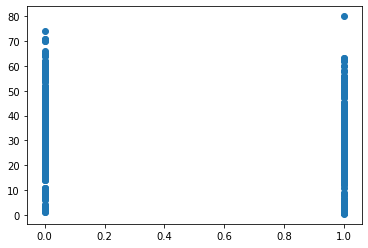

In [25]:
y = dados['Age']
x = dados['Survived']
plt.scatter(x, y)
plt.show()

In [31]:
dados['Age'].corr(dados['Survived'])

-0.07722109457217766

In [ ]:
# Resposta: 
# Da observação do gráfico e do valor obtido acima, conclui-se que não há correlação entre as duas variáveis.

### 11. Existem outliers na coluna age? Quais? Crie um boxplot para esse atributo.

In [ ]:
# Seu código

In [ ]:
# Resposta: Sim, há outliers na coluna age.

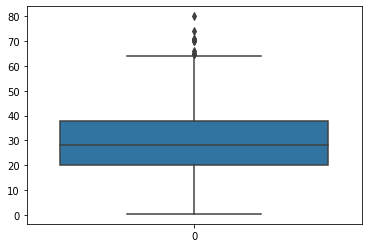

In [26]:
sns.boxplot(data=dados['Age'])

### 12. Cria um histograma para os atributos age, pclass e fare. Quais informações você pode extrair desses gráficos?


In [ ]:
# Seu código

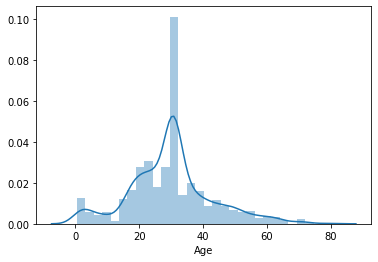

In [27]:
# Atributo Age:
a = dados_2["Age"]
sns.distplot(a)

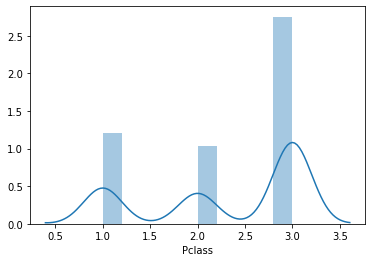

In [28]:
# Atributo Pclass:
b = dados_2['Pclass']
sns.distplot(b)

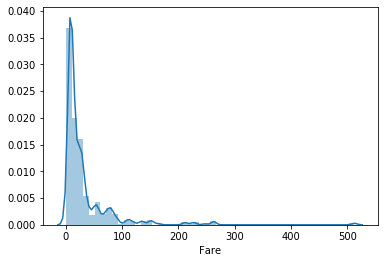

In [29]:
# Atributo Fare:
c = dados_2['Fare']
sns.distplot(c)

### Awari -  <a href="https://awari.com.br/"> awari.com.br</a>